# STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [1]:
%store -r

Unable to restore variable 'ndvi_diff', ignoring (use %store -d to forget!)
The error was: <class 'KeyError'>


You will also need to import any libraries you are using in this
notebook, since they won’t carry over from the previous notebook:

In [2]:
# Import libraries

### work with vectors
import geopandas as gpd 

### work with tabular data
import pandas as pd

### work with rasters
import rioxarray as rxr

### work with data arrays
import xarray as xr

### plotting
import hvplot.pandas

# STEP 4: Is the NDVI different within the **Gila River Indian Community** after the **return of water rights**?

You will compute the mean NDVI inside and outside the fire boundary.
First, use the code below to get a `GeoDataFrame` of the area outside
the Reservation.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Check the variable names - Make sure that the code uses your
boundary <code>GeoDataFrame</code></li>
<li>How could you test if the geometry was modified correctly? Add some
code to take a look at the results.</li>
</ol></div></div>

<Axes: >

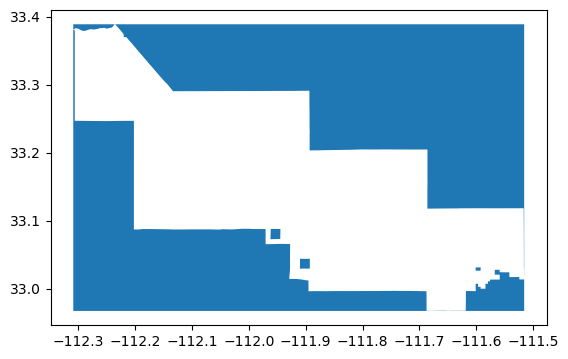

In [ ]:
# Compute the area outside the GRIC boundary

### make new geodataframe for area outside the GRIC boundary
### assign it the same geometry as the gila_gdf's envelope
gila_ext_gdf = (
    gpd.GeoDataFrame(geometry = gila_gdf.envelope)

    ### take out the actual gila_gdf area
    .overlay(gila_gdf, how = "difference"))

### plot
gila_ext_gdf.plot()

Next, clip your DataArray to the boundaries for both inside and outside
the reservation. You will need to replace the `GeoDataFrame` name with
your own. Check out the [lesson on clipping data with the `rioxarray`
library in the
textbook](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/raster-data-processing/crop-raster-data-with-shapefile-in-python/).

> **GOTCHA ALERT**
>
> It’s important to use `from_disk=True` when clipping large arrays like
> this. It allows the computer to use less valuable memory resources
> when clipping - you will probably find that otherwise the cell below
> crashes your kernel.

In [8]:
# Clip NDVI data to both inside and outside the boundary

### clip data to gric
### from_disk = True so computer uses less memory, avoid kernel crashing
ndvi_inside = ndvi_da.rio.clip(gila_gdf.geometry, from_disk=True)
ndvi_inside

<xarray.Dataset> Size: 47MB
Dimensions:      (x: 379, y: 202, date: 154)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 3kB -112.3 -112.3 -112.3 ... -111.5 -111.5 -111.5
  * y            (y) float64 2kB 33.39 33.38 33.38 33.38 ... 32.97 32.97 32.97
  * date         (date) datetime64[ns] 1kB 2001-05-25 2001-06-10 ... 2022-08-29
    spatial_ref  int64 8B 0
Data variables:
    NDVI         (date, y, x) float32 47MB nan nan nan nan ... nan nan nan nan

In [9]:
### clip data outside gric
### from_disk = True so computer uses less memory, avoid kernel crashing
ndvi_outside = ndvi_da.rio.clip(gila_ext_gdf.geometry, from_disk=True)
print(ndvi_outside)

<xarray.Dataset> Size: 48MB
Dimensions:      (x: 380, y: 203, date: 154)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 3kB -112.3 -112.3 -112.3 ... -111.5 -111.5 -111.5
  * y            (y) float64 2kB 33.39 33.39 33.38 33.38 ... 32.97 32.97 32.97
  * date         (date) datetime64[ns] 1kB 2001-05-25 2001-06-10 ... 2022-08-29
    spatial_ref  int64 8B 0
Data variables:
    NDVI         (date, y, x) float32 48MB 0.6146 0.3796 ... 0.1736 0.2146


<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>For <strong>both inside and outside</strong> the <span
data-__quarto_custom="true" data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="3"></span> boundary:</p>
<ul>
<li>Group the data by year</li>
<li>Take the mean. You always need to tell reducing methods in
<code>xarray</code> what dimensions you want to reduce. When you want to
summarize data across <strong>all</strong> dimensions, you can use the
<code>...</code> syntax, e.g. <code>.mean(...)</code> as a
shorthand.</li>
<li>Select the NDVI variable</li>
<li>Convert to a DataFrame using the <code>to_dataframe()</code>
method</li>
<li>Join the two DataFrames for plotting using the <code>.join()</code>
method. You will need to rename the columns using the
<code>lsuffix=</code> and <code>rsuffix=</code> parameters</li>
</ul>
<p>Finally, plot annual July means for both inside and outside the
Reservation on the same plot.</p></div></div>

> **GOTCHA ALERT**
>
> The DateIndex in pandas is a little different from the Datetime
> Dimension in xarray. You will need to use the `.dt.year` syntax to
> access information about the year, not just `.year`.

In [ ]:
# Compute mean annual July NDVI

### inside gric
july_ndvi_inside_df = (ndvi_inside
                       
                       ### group by year so we can plot by year
                       .groupby(ndvi_inside.date.dt.year)

                       ### get mean NDVI
                       .mean(...)
                       .NDVI
                       
                       ### convert data to a dataframe
                       .to_dataframe())

### check it out
print('Mean NDVI inside GRIC\n', july_ndvi_inside_df.head())

### outside gric
july_ndvi_outside_df = (ndvi_outside
                       .groupby(ndvi_outside.date.dt.year)
                       .mean(...)
                       .NDVI.to_dataframe())
print('Mean NDVI outside GRIC\n', july_ndvi_outside_df.head())

Mean NDVI inside GRIC
       band  spatial_ref      NDVI
year                             
2001     1            0  0.199645
2002     1            0  0.177933
2003     1            0  0.187302
2004     1            0  0.176162
2005     1            0  0.238630
Mean NDVI outside GRIC
       band  spatial_ref      NDVI
year                             
2001     1            0  0.247629
2002     1            0  0.226726
2003     1            0  0.229889
2004     1            0  0.221753
2005     1            0  0.255275


In [12]:
july_ndvi_inside_df.head()

,band,spatial_ref,NDVI
year,,,
2001,1,0,0.199645
2002,1,0,0.177933
2003,1,0,0.187302
2004,1,0,0.176162
2005,1,0,0.238630


In [13]:
# Join inside and outside GRIC df and rename columns
july_ndvi_df = (
    
    ### tell it which column to grab data from for the first df
    july_ndvi_inside_df[['NDVI']]
    
                ### tell it what data to grab from in the second df
                .join(july_ndvi_outside_df[['NDVI']], 
                      
                      ### rename the cols

                      ### left = first df
                      lsuffix='_inside',

                      ### right = second df
                      rsuffix='_outside'))
july_ndvi_df

,NDVI_inside,NDVI_outside
year,,
2001,0.199645,0.247629
2002,0.177933,0.226726
2003,0.187302,0.229889
2004,0.176162,0.221753
2005,0.238630,0.255275
2006,0.211491,0.235571
2007,0.181710,0.211984
2008,0.201902,0.237739
2009,0.179118,0.218907


Now, take the difference between outside and inside the site boundary
and plot that. What do you observe? Don’t forget to write a headline and
description of your plot!

In [16]:
# Plot mean NDVI inside and outside the boundary
july_ndvi_df.hvplot(title = "Mean July NDVI inside and outside GRIC")

:NdOverlay   [Variable]
   :Curve   [year]   (value)

In [17]:
# Plot difference inside and outside the boundary

### calculate the difference
july_ndvi_df['difference'] = (july_ndvi_df['NDVI_inside']
                              - july_ndvi_df['NDVI_outside'])

july_ndvi_df

,NDVI_inside,NDVI_outside,difference
year,,,
2001,0.199645,0.247629,-0.047984
2002,0.177933,0.226726,-0.048793
2003,0.187302,0.229889,-0.042588
2004,0.176162,0.221753,-0.045591
2005,0.238630,0.255275,-0.016645
2006,0.211491,0.235571,-0.024079
2007,0.181710,0.211984,-0.030274
2008,0.201902,0.237739,-0.035836
2009,0.179118,0.218907,-0.039790


In [18]:
### plot it
july_ndvi_df.difference.hvplot("Difference in mean July NDVI inside and outside GRIC")

:Curve   [Difference in mean July NDVI inside and outside GRIC]   (difference)

YOUR HEADLINE AND DESCRIPTION HERE

# STEP -1: Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! Replace `var1` and `var2` with the variable you want to save,
separated by spaces.

In [11]:
%store var1 var2

Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!